# Clustering analysis

Here we will code several clustering methods like: k-Means, DBSCAN and Agglomerative clustering using python library sklearn.

Here we shall use synthetic dataset.

## Create the dataset

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

We will create dataset with 3 clusters with 0.5 standard deviation for each cluster. Number of sample 300 and we also choose three points as centroids (centre of clusters).

In [2]:
# Determine centroids
centres = [[0.5, 2], [-1,-1], [1.5, -1]]

# Create dataset
X, y = make_blobs(n_samples=300, centers=centres, cluster_std=0.5, random_state=100)

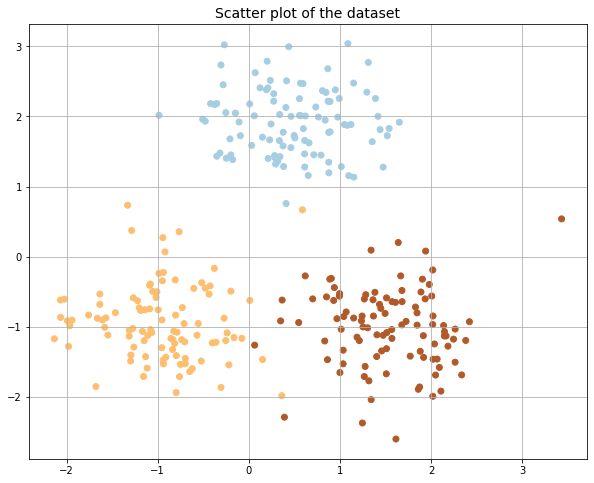

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.grid()
plt.title("Scatter plot of the dataset", fontsize=14)
plt.show()

## Scale the dataset

In [6]:
X = StandardScaler().fit_transform(X)

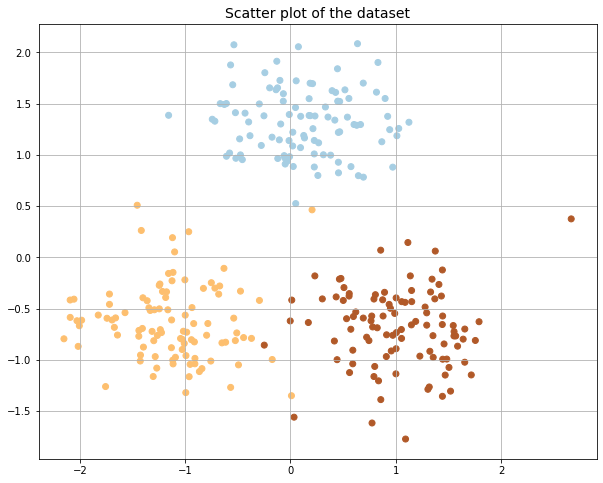

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.grid()
plt.title("Scatter plot of the dataset", fontsize=14)
plt.show()

## Apply k-means clustering

In [8]:
from sklearn.cluster import KMeans

### Finding optimal number of clusters in k-means (Elbow Method)

In [9]:
K = range(2, 10)

In [11]:
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd = model.inertia_   # .inertia_ attribute will give us the SSD
    sum_of_squared_distances.append(ssd)

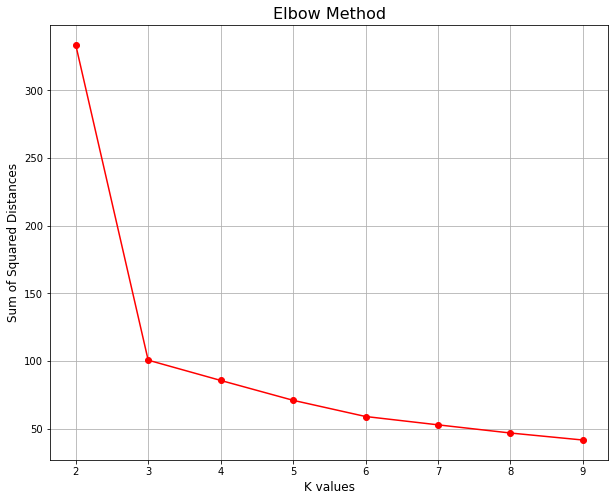

In [15]:
plt.figure(figsize=(10,8))
plt.plot(K, sum_of_squared_distances, "ro-")
plt.xlabel("K values", fontsize=12)
plt.ylabel("Sum of Squared Distances",fontsize=12)
plt.title("Elbow Method",fontsize=16)
plt.grid()
plt.show()

So from our above exercise we can see that K=3 is the optimum number of cluster

### Fit the KMeans cluster with right value of k

In [16]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [20]:
labels = model.predict(X)

In [21]:
centroids = model.cluster_centers_

In [24]:
centroids

array([[ 0.1219279 ,  1.31300138],
       [ 1.01820081, -0.69176953],
       [-1.15287676, -0.64076956]])

### Plot the output of kMeans clustering

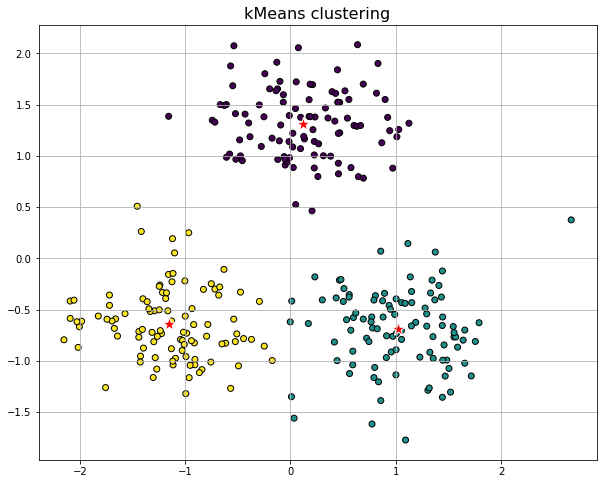

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=labels, edgecolor='k')
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='*', edgecolor='w')
plt.grid()
plt.title("kMeans clustering", fontsize=16)
plt.show()

### Obtain the Sihoutte Score of the clusters

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
s = silhouette_score(X, labels, metric='euclidean')

In [46]:
print(f"The Silhouette score of KMeans clustering: {s:0.2f}",)

The Silhouette score of KMeans clustering: 0.65


## Apply DBSCAN clustering

In [47]:
from sklearn.cluster import DBSCAN

### Determine eps and minPts

In [91]:
eps = 0.40
minPts = 16

### Create the DBSCAN model and fit it

In [92]:
dbscan_model = DBSCAN(eps=eps, min_samples=minPts)

In [93]:
dbscan_model.fit(X)

DBSCAN(eps=0.4, min_samples=16)

In [94]:
labels_dbscan = dbscan_model.fit_predict(X)

### Plot the output of DBSCAN

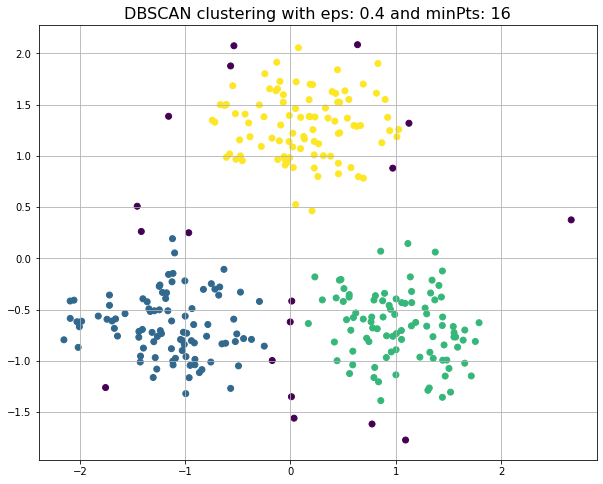

In [95]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=labels_dbscan)
plt.title(f"DBSCAN clustering with eps: {eps} and minPts: {minPts}", fontsize=16)
plt.grid()
plt.show()

in this sklearn implementation of DBSCAN, label = -1 implies Noise points

### Obtain the silhoutte score

In [98]:
print(f"The silhoutte score: {silhouette_score(X, labels_dbscan, metric='euclidean'):0.2f}")

The silhoutte score: 0.59


### Methods for obtaining Optimal values of eps and MinPts based on Silhoutte scores

In [100]:
range_of_eps = np.arange(0.1, 1.0, 0.1)
range_of_minPts = np.arange(5, 40, 5)

In [101]:
eps_minpts_comb = [(x,y) for x in range_of_eps for y in range_of_minPts]

In [106]:
def find_optimal_eps_minpts(values):
    best_score = -1
    for eps, minpts in values:
        dbscan_model = DBSCAN(eps=eps, min_samples=minpts)
        dbscan_model.fit(X)
        y_pred = dbscan_model.fit_predict(X)
        n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
        if n_clusters >= 2:
            score = silhouette_score(X, labels=y_pred, metric='euclidean')
            if score > best_score:
                best_score = score
                best_eps = eps
                best_minpts = minpts
    return best_eps, best_minpts, best_score

In [107]:
find_optimal_eps_minpts(eps_minpts_comb)

(0.6, 30, 0.6348839665403752)

### Optimal DBSCAN model

In [108]:
dbscan_model = DBSCAN(eps=0.6, min_samples=30)

In [109]:
y_pred = dbscan_model.fit_predict(X)

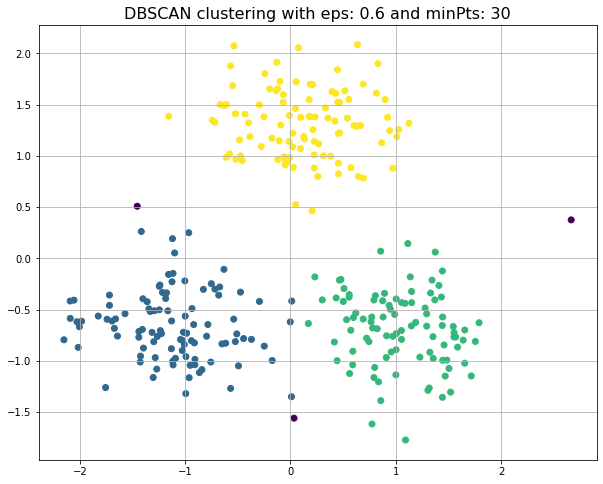

In [110]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title(f"DBSCAN clustering with eps: 0.6 and minPts: 30", fontsize=16)
plt.grid()
plt.show()

## Agglomeartive Clustering

In [111]:
from sklearn.cluster import AgglomerativeClustering

### Create agglomearive clustering model and fit it

In [115]:
agg_cluster = AgglomerativeClustering(n_clusters=3)

In [116]:
y_pred_agg = agg_cluster.fit_predict(X)

### Plot the output of Agglomerative Clustering

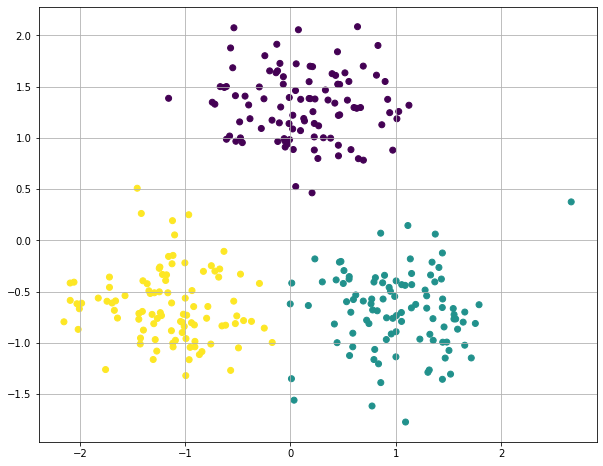

In [117]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred_agg)
plt.grid()
plt.show()

### Silhoutte score of Agglomerative Clustering

In [118]:
silhouette_score(X, y_pred_agg, metric='euclidean')

0.6472412342728544

### Visualizing the dendograms of Agglomerative Clustering

In [119]:
import scipy.cluster.hierarchy as shc

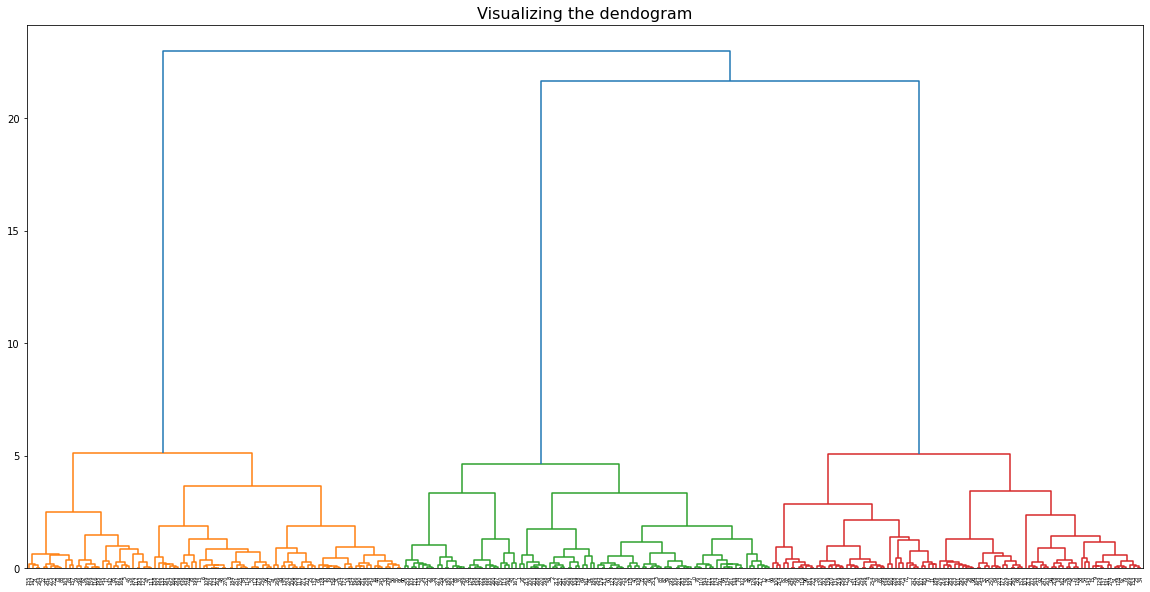

In [121]:
plt.figure(figsize=(20,10))
Dendogram = shc.dendrogram((shc.linkage(X, method='ward')))
plt.title("Visualizing the dendogram", size=16)
plt.show()